# Cleaning & Editing

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('test_arabam.csv').drop(columns='Unnamed: 0')

In [3]:
test

,price_try,make,series,model,year,km,transmission,fuel,body_type,warranty,...,cylinder_number,torque_nm,engine_capacity_cc,engine_power_hp,max_power_rpm,min_power_rpm,acceleration_0to100_sec,max_speed_kmh,average_fuel_consumption_lt,painted_changed
0,700000,Ford,Focus,1.6 Titanium,2009,281000,Otomatik,LPG & Benzin,Sedan,NaN,...,4.0,150.0,1596,100,6000.0,4000.0,"14,2",182.0,"6,7",Belirtilmemiş
1,760000,Renault,Clio,1.5 dCi Icon,2017,162000,Yarı Otomatik,Dizel,Hatchback/5,NaN,...,4.0,220.0,1461,90,4000.0,1750.0,"12,9",176.0,"3,7",2 boyalı
2,400000,Opel,Corsa,1.2 Comfort,2003,205000,Yarı Otomatik,LPG & Benzin,Hatchback/5,Garantisi Yok,...,4.0,110.0,1199,75,NaN,NaN,14,170.0,"6,2","2 değişen, 2 boyalı"
3,750000,Ford,Focus,1.6 Ti-VCT Trend X,2014,209000,Düz,LPG & Benzin,Sedan,Garantisi Yok,...,4.0,158.0,1596,125,6300.0,4000.0,"10,9",198.0,6,Tamamı orjinal
4,115000,Skoda,Favorit,1.3 LX,1993,217000,Düz,LPG & Benzin,Hatchback/5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,435000,Opel,Astra,1.6 Enjoy,2005,228000,Düz,LPG & Benzin,Hatchback/5,Garantisi Yok,...,4.0,150.0,1598,105,6000.0,3900.0,"12,3",185.0,"6,6","5 değişen, 4 boyalı"
996,200000,Renault,R 19,1.6 Europa RL,1997,370000,Düz,LPG & Benzin,Hatchback/5,NaN,...,4.0,131.0,1598,90,5250.0,2500.0,"14,8",187.0,NaN,Belirtilmemiş
997,325000,Fiat,Linea,1.6 Multijet Active Plus,2011,446000,Düz,Dizel,Sedan,NaN,...,4.0,290.0,1598,105,4000.0,1500.0,11,190.0,5,"1 değişen, 5 boyalı"
998,550000,Renault,Symbol,1.4 Expression,2011,60000,Düz,Benzin,Sedan,NaN,...,4.0,114.0,1390,75,5500.0,4250.0,"12,5",170.0,"7,1",Tamamı orjinal


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_try                    1000 non-null   object 
 1   make                         1000 non-null   object 
 2   series                       1000 non-null   object 
 3   model                        999 non-null    object 
 4   year                         1000 non-null   object 
 5   km                           1000 non-null   int64  
 6   transmission                 1000 non-null   object 
 7   fuel                         1000 non-null   object 
 8   body_type                    1000 non-null   object 
 9   warranty                     432 non-null    object 
 10  from_                        1000 non-null   object 
 11  wheel_drive                  963 non-null    object 
 12  cylinder_number              940 non-null    float64
 13  torque_nm          

In [5]:
test.corr()

,km,cylinder_number,torque_nm,max_power_rpm,min_power_rpm,max_speed_kmh
km,1.000000,0.224270,-0.087530,-0.096588,0.019074,-0.105328
cylinder_number,0.224270,1.000000,0.093488,0.002446,0.121459,0.186259
torque_nm,-0.087530,0.093488,1.000000,-0.656052,-0.613216,0.578021
max_power_rpm,-0.096588,0.002446,-0.656052,1.000000,0.807318,0.064156
min_power_rpm,0.019074,0.121459,-0.613216,0.807318,1.000000,-0.039689
max_speed_kmh,-0.105328,0.186259,0.578021,0.064156,-0.039689,1.000000


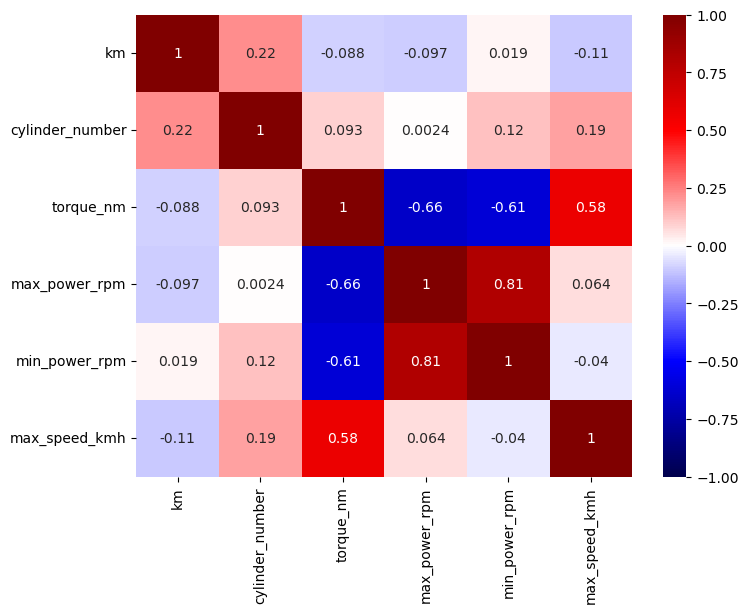

In [6]:
plt.figure(figsize=[8,6])
sns.heatmap(test.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [7]:
test['engine_capacity_cc'].unique()

array(['1596', '1461', '1199', nan, '1399', '1560', '1580', '1997',
       '1598', '1390', '1364', '1587', '1595', '1798', '1242', '1332',
       '1499', '1581', '1248', '1493', '1582', '1398', '1498', '1397',
       '1360', '1197', '1396', '1599', '1149', '898', '1368', '1372',
       '1339', '1395', '1201 - 1400 cm3', '1500', '1781', '1342', '1229',
       '1388', '1495', '1896', '999', '1490', '1422', '1198', '1991',
       '1796', '1721', '998', '1895', '1995', '1496', '1591', '1405',
       '2001 - 2500 cm3', '1489', '1289', '1998', '1968', '1586', '1400',
       '1297', '1298', '1597', '1300', '1341', '1488', '1401 - 1600 cm3',
       '2171', '2498', '1497', '1698', '1329', '2148', '1590',
       "1200 cm3' e kadar", '2494', '1588', '1801 - 2000 cm3',
       '1601 - 1800 cm3', '1239', '-', '1592', '1108', '1769', '1999',
       '1686', '1462', '1240', '1600'], dtype=object)

In [8]:
test['engine_capacity_cc'] = test['engine_capacity_cc'].str.extract('(\d+)')

In [9]:
test[test['engine_capacity_cc'].isna()]

,price_try,make,series,model,year,km,transmission,fuel,body_type,warranty,...,cylinder_number,torque_nm,engine_capacity_cc,engine_power_hp,max_power_rpm,min_power_rpm,acceleration_0to100_sec,max_speed_kmh,average_fuel_consumption_lt,painted_changed
4,115000,Skoda,Favorit,1.3 LX,1993,217000,Düz,LPG & Benzin,Hatchback/5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
25,470000,Nissan,Note,1.5 dCi Tekna,2008,198000,Düz,Dizel,MPV,NaN,...,NaN,NaN,NaN,101 - 125 HP,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
36,260000,Mitsubishi,Carisma,1.8 GLS,2000,246000,Düz,Benzin,Hatchback/3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
136,355000,Fiat,Albea,1.3 Multijet Dynamic,2005,290000,Düz,Dizel,Sedan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
223,215000,Hyundai,Accent,1.3 LS,1998,303000,Düz,LPG & Benzin,Sedan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 değişen
238,960000,Skoda,Octavia,1.6 TDI Optimal,2014,156000,Otomatik,Dizel,Sedan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 boyalı
254,699000,Dacia,Sandero,0.9 TCe Stepway,2016,52000,Yarı Otomatik,Benzin,Hatchback/5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 boyalı
255,175000,Tofaş,Şahin,1.4,1999,150000,Düz,LPG & Benzin,Sedan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 değişen, 1 boyalı"
292,300000,Mercedes - Benz,300,D,1986,360000,Düz,Benzin,Hatchback/5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
336,349000,Toyota,Corolla,1.6 GLi,1996,359047,Düz,LPG & Benzin,Sedan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 değişen, 3 boyalı"


In [10]:
engine_capacity_dict = {
    '1.3 LX': '1300',
    '1.5 dCi Tekna': '1500',
    '1.8 GLS': '1800',
    '1.3 Multijet Dynamic': '1300',
    '1.3 LS': '1300',
    '1.6 TDI Optimal': '1600',
    '0.9 TCe Stepway': '900',
    '1.4': '1400',
    'D': '2500',
    '1.6 GLi': '1600',
    '1.4 100.Yıl': '1400',
    '1.6 CRDI Mode Plus': '1600',
    '1.5 dCi Laureate': '1500',
    '1.6 D Premium': '1600',
    '1.4 D-4D Advance': '1400',
    '1.3 CDTI Enjoy Plus': '1300',
    '1.4 Broadway RN': '1400',
    '1.2 Turbo Dynamic': '1200',
    '1.4 Fire Urban': '1400',
    '1.5 dCi Authentique': '1500',
    '1.4 Copa': '1400',
    '1.6': '1600',
    '1.6 HDi Live': '1600',
    '1.6 TDi BlueMotion Impression': '1600',
    '1.6 Class': '1600',
    '2.0 XL': '2000',
    '320i': '1600',
    '1.3 XL': '1300',
    'Sole 1.3 Multijet Active': '1300',
    '1.4 Broadway': '1400',
    'A5 Sportback 1.4 TFSI': '1400',
    '1.6 Europa RTE': '1600',
    '1.5 dCi Joy': '1500',
    '1.3 Multijet Easy Stil': '1300',
    '1.5 Blue DCI Joy Comfort': '1500',
    '1.6 SX A': '1600',
    '1.5 CRDi-VGT Select': '1500',
    '1.4 D-4D Comfort Extra': '1400',
    '1.5 dCi Extreme': '1500',
    '1.6 SLX': '1600'
}

test['engine_capacity_cc'] = test['engine_capacity_cc'].fillna(test['model'].map(engine_capacity_dict))

In [11]:
test['engine_capacity_cc'][705]

'1600'

In [12]:
test['engine_capacity_cc'] = test['engine_capacity_cc'].astype(int)

In [13]:
test['engine_capacity_cc'].isna().sum()

0

In [14]:
test['engine_capacity_cc'].unique()

array([1596, 1461, 1199, 1300, 1399, 1560, 1580, 1997, 1598, 1390, 1364,
       1587, 1595, 1798, 1500, 1242, 1332, 1499, 1581, 1800, 1248, 1493,
       1582, 1398, 1498, 1397, 1360, 1197, 1396, 1599, 1149,  898, 1368,
       1372, 1339, 1395, 1201, 1781, 1342, 1229, 1388, 1495, 1896,  999,
       1490, 1422, 1198, 1991, 1796, 1721,  998, 1895, 1995, 1496, 1591,
       1600, 1405, 2001, 1489,  900, 1400, 1289, 2500, 1998, 1968, 1586,
       1297, 1298, 1597, 1341, 1488, 1401, 2171, 2498, 1497, 1200, 1698,
       1329, 2148, 1590, 2494, 1588, 2000, 1801, 1601, 1239, 1592, 1108,
       1769, 1999, 1686, 1462, 1240])

# -------------------------------------------------------------------------------------------

In [15]:
test['cylinder_number'].unique()

array([ 4., nan,  3.,  6.])

In [16]:
test[test['cylinder_number'] == 6.0]['engine_capacity_cc'].min()

1991

In [17]:
test[test['cylinder_number'] == 4.0]['engine_capacity_cc'].min()

1108

In [18]:
test[test['cylinder_number'] == 3.0]['engine_capacity_cc'].min()

898

In [19]:
cylinder_list= []

for index, row in test.iterrows():
    if row['engine_capacity_cc'] >= 1991:
        cylinder_list.append(6)
    elif row['engine_capacity_cc'] >= 1108:
        cylinder_list.append(4)
    elif row['engine_capacity_cc'] >= 898:
        cylinder_list.append(3)
    else:
        cylinder_list.append(row['cylinder_number'])
        
cylinder_series = pd.Series(cylinder_list)

test['cylinder_number'] = test['cylinder_number'].fillna(cylinder_series)

In [20]:
cylinder_series[248]

6

In [21]:
test['cylinder_number'][248]

6.0

In [22]:
test['cylinder_number'] = test['cylinder_number'].astype(int)

In [23]:
test['cylinder_number'].isna().sum()

0

In [24]:
test['cylinder_number'].unique()

array([4, 3, 6])

# -------------------------------------------------------------------------------------------

In [25]:
test['torque_nm'].unique()

array([150., 220., 110., 158.,  nan, 125., 230., 142., 154., 155., 200.,
       205., 145., 160., 148., 152., 250., 320., 104., 111., 240., 131.,
       235., 300., 130., 190., 133., 100., 120., 225., 134., 105., 121.,
       135., 175., 140., 123., 127., 180.,  90., 119., 114., 210., 115.,
       124., 122., 185., 153., 270., 157., 112., 159., 118., 106., 156.,
        95., 216., 254., 350., 132., 151., 188., 380., 143.,  99., 137.,
       107., 400., 184., 136., 117., 144., 102., 128., 290., 126., 280.,
       138., 173., 149., 147., 260., 315., 196., 195., 255., 204., 172.,
       183., 170., 450.,  88., 165., 340.,  92.,  87.])

In [26]:
torque_list= []

for index, row in test.iterrows():
    if row['engine_capacity_cc'] >= 2500:
        torque_list.append(250)
    elif row['engine_capacity_cc'] >= 2400:
        torque_list.append(240)
    elif row['engine_capacity_cc'] >= 1990:
        torque_list.append(200)
    elif row['engine_capacity_cc'] >= 1780:
        torque_list.append(180)
    elif row['engine_capacity_cc'] >= 1560:
        torque_list.append(150)
    elif row['engine_capacity_cc'] >= 1380:
        torque_list.append(140)
    elif row['engine_capacity_cc'] >= 1280:
        torque_list.append(130)
    elif row['engine_capacity_cc'] >= 1200:
        torque_list.append(120)
    elif row['engine_capacity_cc'] >= 1100:
        torque_list.append(110)
    elif row['engine_capacity_cc'] >= 800:
        torque_list.append(90)
    else:
        torque_list.append(row['torque_nm'])
        
torque_series = pd.Series(torque_list)

test['torque_nm'] = test['torque_nm'].fillna(torque_series)

In [27]:
torque_series[8]

200

In [28]:
test['torque_nm'][8]

200.0

In [29]:
test['torque_nm'] = test['torque_nm'].astype(int)

In [30]:
test['torque_nm'].isna().sum()

0

In [31]:
test['torque_nm'].unique()

array([150, 220, 110, 158, 130, 125, 230, 142, 200, 154, 155, 205, 145,
       160, 148, 152, 250, 320, 140, 104, 111, 240, 180, 131, 235, 300,
       190, 133, 100, 120, 225, 134, 105, 121, 135, 175, 123, 127,  90,
       119, 114, 210, 115, 124, 122, 185, 153, 270, 157, 112, 159, 118,
       106, 156,  95, 216, 254, 350, 132, 151, 188, 380, 143,  99, 137,
       107, 400, 184, 136, 117, 144, 102, 128, 290, 126, 280, 138, 173,
       149, 147, 260, 315, 196, 195, 255, 204, 172, 183, 170, 450,  88,
       165, 340,  92,  87])

# -------------------------------------------------------------------------------------------

In [32]:
test['engine_power_hp'].unique()

array(['100', '90', '75', '125', nan, '97', '95', '101', '118', '124',
       '115', '114', '93', '68', '65', '102', '122', '110', '120', '160',
       '101 - 125 HP', '81', '88', '86', '105', '106', '83', '136', '69',
       '70', '76', '103', '116', '84', '71', '76 - 100 HP', '150', '72',
       '80', '85', '92', '109', '152', '140', '112', '170', '132', '130',
       '156', '74', '82', '158', '177', '94', '180', '60', '147', '107',
       '111', '54', '117', '190', '77', '64', '98', '126 - 150 HP', '67',
       '51 - 75 HP', '184', '143', '123', '87', '57', '91', '96', '66',
       '128', '99', "50 HP'ye kadar", '192', '176 - 200 HP', '133', '-',
       '218', '58', '145', '127', '186', '121'], dtype=object)

In [33]:
test['engine_power_hp'] = test['engine_power_hp'].str.extract('(\d+)')

In [34]:
engine_power_list= []

for index, row in test.iterrows():
    if row['engine_capacity_cc'] >= 2400:
        engine_power_list.append(175)
    elif row['engine_capacity_cc'] >= 2000:
        engine_power_list.append(150)
    elif row['engine_capacity_cc'] >= 1590:
        engine_power_list.append(125)
    elif row['engine_capacity_cc'] >= 1580:
        engine_power_list.append(115)
    elif row['engine_capacity_cc'] >= 1400:
        engine_power_list.append(100)
    elif row['engine_capacity_cc'] >= 1300:
        engine_power_list.append(95)
    elif row['engine_capacity_cc'] >= 1200:
        engine_power_list.append(75)
    elif row['engine_capacity_cc'] >= 900:
        engine_power_list.append(60)
    else:
        engine_power_list.append(row['engine_power_hp'])
        
engine_power_series = pd.Series(engine_power_list)

test['engine_power_hp'] = test['engine_power_hp'].fillna(engine_power_series)

In [35]:
engine_power_series[36]

125

In [36]:
test['engine_power_hp'][36]

125

In [37]:
test['engine_power_hp'] = test['engine_power_hp'].astype(int)

In [38]:
test['engine_power_hp'].isna().sum()

0

In [39]:
test['engine_power_hp'].unique()

array([100,  90,  75, 125,  95,  97, 101, 118, 124, 115, 114,  93,  68,
        65, 102, 122, 110, 120, 160,  81,  88,  86, 105, 106,  83, 136,
        69,  70,  76, 103, 116,  84,  71, 150,  72,  80,  85,  92, 109,
       152, 140, 112, 170, 132, 130, 156,  74,  82, 158, 177,  94,  60,
       180, 147, 175, 107, 111,  54, 117, 190,  77,  64,  98, 126,  67,
        51, 184, 143, 123,  87,  57,  91,  96,  66, 128,  99,  50, 192,
       176, 133, 218,  58, 145, 127, 186, 121])

# -------------------------------------------------------------------------------------------

In [40]:
test['max_power_rpm'].unique()

array([6000., 4000.,   nan, 6300., 3600., 5500., 5000., 3800., 3500.,
       3750., 6500., 3200., 5800., 4400., 5400., 5600., 4800., 5750.,
       5700., 5100., 2500., 4200., 6200., 6600., 3000., 6700., 3250.,
       6400., 5200., 5300., 4500., 4900., 5250., 6100., 6250., 4600.])

In [41]:
max_power_list= []

for index, row in test.iterrows():
    if row['torque_nm'] >= 300:
        max_power_list.append(3000)
    elif row['torque_nm'] >= 80:
        max_power_list.append(2500)
    else:
        max_power_list.append(row['max_power_rpm'])
        
max_power_series = pd.Series(max_power_list)

test['max_power_rpm'] = test['max_power_rpm'].fillna(max_power_series)

In [42]:
max_power_series[8]

2500

In [43]:
test['max_power_rpm'][8]

2500.0

In [44]:
test['max_power_rpm'] = test['max_power_rpm'].astype(int)

In [45]:
test['max_power_rpm'].isna().sum()

0

In [46]:
test['max_power_rpm'].unique()

array([6000, 4000, 2500, 6300, 3600, 5500, 5000, 3800, 3500, 3750, 6500,
       3200, 5800, 4400, 5400, 5600, 4800, 5750, 5700, 3000, 5100, 4200,
       6200, 6600, 6700, 3250, 6400, 5200, 5300, 4500, 4900, 5250, 6100,
       6250, 4600])

# -------------------------------------------------------------------------------------------

In [47]:
test['min_power_rpm'].unique()

array([4000., 1750.,   nan, 3200., 2000., 4500., 3800., 1800., 1900.,
       4200., 1500., 4250., 4700., 3250., 2900., 4400., 2500., 3400.,
       1400., 3000., 4100., 3500., 2800., 5200., 1250., 5000., 4800.,
       1700., 1550., 2750., 2250., 1600., 4850., 3900., 5500., 2600.,
       1850., 3750., 4300., 5250., 3600., 2200., 3300.])

In [48]:
min_power_list= []

for index, row in test.iterrows():
    if row['max_power_rpm'] >= 5000:
        min_power_list.append(3500)
    elif row['max_power_rpm'] >= 4000:
        min_power_list.append(2000)
    elif row['max_power_rpm'] >= 2500:
        min_power_list.append(1200)
    else:
        min_power_list.append(row['min_power_rpm'])
        
min_power_series = pd.Series(min_power_list)

test['min_power_rpm'] = test['min_power_rpm'].fillna(min_power_series)

In [49]:
min_power_series[15]

1200

In [50]:
test['min_power_rpm'][15]

1200.0

In [51]:
test['min_power_rpm'] = test['min_power_rpm'].astype(int)

In [52]:
test['min_power_rpm'].isna().sum()

0

In [53]:
test['min_power_rpm'].unique()

array([4000, 1750, 1200, 3200, 2000, 4500, 3800, 1800, 1900, 4200, 1500,
       4250, 4700, 3250, 2900, 4400, 2500, 3400, 1400, 3000, 4100, 3500,
       2800, 5200, 1250, 5000, 4800, 1700, 1550, 2750, 2250, 1600, 4850,
       3900, 5500, 2600, 1850, 3750, 4300, 5250, 3600, 2200, 3300])

# -------------------------------------------------------------------------------------------

In [54]:
test['acceleration_0to100_sec'] = test['acceleration_0to100_sec'].str.replace(',', '.').astype(float)

In [55]:
test['acceleration_0to100_sec'].unique()

array([14.2, 12.9, 14. , 10.9,  nan, 11.2, 12.5, 11.7, 10.5, 14.7, 10. ,
       14.9, 16.5, 12.7,  9.5, 11.5, 10.3, 12.3,  9.8, 10.7,  7.8, 13.2,
        9.1,  9.9, 11.1, 11. , 13.8, 10.8, 13.1, 11.8, 12.2, 16.2, 13.7,
       13. , 14.6, 12.1, 11.9, 14.5, 15. , 10.2,  8.9, 13.5,  8.5,  9.7,
       14.3, 12.6, 11.4,  9.3, 12. , 12.4, 14.1,  9.4, 15.1, 16.4,  9. ,
       10.4, 13.3, 11.3,  8.7,  8.3,  8.4,  7.6, 15.4, 13.6, 10.6, 13.9,
       15.2,  7.9,  8.2, 13.4, 14.8, 15.8, 17.8, 15.9,  9.6, 11.6, 17.1,
        8.1,  9.2,  8.8,  8.6,  7.7, 16.8, 12.8, 10.1,  8. , 14.4, 19. ,
        7.3, 16. , 17.9, 15.3])

In [56]:
acceleration_list= []

for index, row in test.iterrows():
    if row['torque_nm'] >= 200:
        acceleration_list.append(13.6)
    elif row['torque_nm'] >= 80:
        acceleration_list.append(16.4)
    else:
        acceleration_list.append(row['acceleration_0to100_sec'])
        
acceleration_series = pd.Series(acceleration_list)

test['acceleration_0to100_sec'] = test['acceleration_0to100_sec'].fillna(acceleration_series)

In [57]:
acceleration_series[8]

13.6

In [58]:
test['acceleration_0to100_sec'][8]

13.6

In [59]:
test['acceleration_0to100_sec'].isna().sum()

0

In [60]:
test['acceleration_0to100_sec'].unique()

array([14.2, 12.9, 14. , 10.9, 16.4, 11.2, 12.5, 13.6, 11.7, 10.5, 14.7,
       10. , 14.9, 16.5, 12.7,  9.5, 11.5, 10.3, 12.3,  9.8, 10.7,  7.8,
       13.2,  9.1,  9.9, 11.1, 11. , 13.8, 10.8, 13.1, 11.8, 12.2, 16.2,
       13.7, 13. , 14.6, 12.1, 11.9, 14.5, 15. , 10.2,  8.9, 13.5,  8.5,
        9.7, 14.3, 12.6, 11.4,  9.3, 12. , 12.4, 14.1,  9.4, 15.1,  9. ,
       10.4, 13.3, 11.3,  8.7,  8.3,  8.4,  7.6, 15.4, 10.6, 13.9, 15.2,
        7.9,  8.2, 13.4, 14.8, 15.8, 17.8, 15.9,  9.6, 11.6, 17.1,  8.1,
        9.2,  8.8,  8.6,  7.7, 16.8, 12.8, 10.1,  8. , 14.4, 19. ,  7.3,
       16. , 17.9, 15.3])

# -------------------------------------------------------------------------------------------

In [61]:
test['max_speed_kmh'].unique()

array([182., 176., 170., 198.,  nan, 180., 186., 190., 191., 201., 195.,
       164., 160., 192., 200., 188., 197., 187., 203., 222., 185., 166.,
       175., 177., 206., 168., 163., 193., 171., 184., 161., 172., 167.,
       179., 178., 202., 208., 150., 196., 217., 162., 173., 205., 220.,
       189., 210., 194., 181., 207., 169., 165., 199., 223., 183., 215.,
       155., 174., 213., 225., 230., 211., 218., 159., 153., 233., 226.,
       214., 143., 232., 209., 145., 227., 156., 228., 204., 219.])

In [62]:
max_speed_list= []

for index, row in test.iterrows():
    if row['torque_nm'] >= 200:
        max_speed_list.append(175)
    elif row['torque_nm'] >= 80:
        max_speed_list.append(150)
    else:
        max_speed_list.append(row['max_speed_kmh'])
        
max_speed_series = pd.Series(max_speed_list)

test['max_speed_kmh'] = test['max_speed_kmh'].fillna(max_speed_series)

In [63]:
max_speed_series[8]

175

In [64]:
test['max_speed_kmh'][8]

175.0

In [65]:
test['max_speed_kmh'] = test['max_speed_kmh'].astype(int)

In [66]:
test['max_speed_kmh'].isna().sum()

0

In [67]:
test['max_speed_kmh'].unique()

array([182, 176, 170, 198, 150, 180, 186, 175, 190, 191, 201, 195, 164,
       160, 192, 200, 188, 197, 187, 203, 222, 185, 166, 177, 206, 168,
       163, 193, 171, 184, 161, 172, 167, 179, 178, 202, 208, 196, 217,
       162, 173, 205, 220, 189, 210, 194, 181, 207, 169, 165, 199, 223,
       183, 215, 155, 174, 213, 225, 230, 211, 218, 159, 153, 233, 226,
       214, 143, 232, 209, 145, 227, 156, 228, 204, 219])

# -------------------------------------------------------------------------------------------

In [68]:
test['average_fuel_consumption_lt'] = test['average_fuel_consumption_lt'].str.replace(',', '.').astype(float)

In [69]:
test['average_fuel_consumption_lt'].unique()

array([ 6.7,  3.7,  6.2,  6. ,  nan,  4.2,  6.5,  6.8,  4.1,  4.3,  4.5,
        7.7,  7.1,  3.9,  6.6,  7.2,  5.8,  3.5,  4.9,  4.6,  4. ,  7.8,
        7.4,  4.7,  6.4,  4.4,  7.5,  5.1,  8.4,  5.9,  5.7,  5. ,  3.8,
        5.3,  6.9,  8.1,  5.4,  3.6,  5.2,  6.1,  4.8,  5.6,  5.5,  8. ,
        9.4, 10.3,  6.3,  7.3,  7.9,  7. ,  7.6, 10.2,  8.7,  8.3,  9.8,
        8.2, 11.1,  9. ,  8.5,  9.7,  9.5,  8.9,  9.1])

In [70]:
fuel_consumption_list= []

for index, row in test.iterrows():
    if row['min_power_rpm'] >= 5000:
        fuel_consumption_list.append(7.4)
    elif row['min_power_rpm'] >= 4000:
        fuel_consumption_list.append(6.6)
    elif row['min_power_rpm'] >= 3000:
        fuel_consumption_list.append(6.5)
    elif row['min_power_rpm'] >= 2000:
        fuel_consumption_list.append(6.2)
    elif row['min_power_rpm'] >= 1000:
        fuel_consumption_list.append(5.5)
    else:
        fuel_consumption_list.append(row['average_fuel_consumption_lt'])
        
fuel_consumption_series = pd.Series(fuel_consumption_list)

test['average_fuel_consumption_lt'] = test['average_fuel_consumption_lt'].fillna(fuel_consumption_series)

In [71]:
fuel_consumption_series[7]

6.6

In [72]:
test['average_fuel_consumption_lt'][7]

6.6

In [73]:
test['average_fuel_consumption_lt'].isna().sum()

0

In [74]:
test['average_fuel_consumption_lt'].unique()

array([ 6.7,  3.7,  6.2,  6. ,  5.5,  4.2,  6.6,  6.5,  6.8,  4.1,  4.3,
        4.5,  7.7,  7.1,  3.9,  7.2,  5.8,  3.5,  4.9,  4.6,  4. ,  7.8,
        7.4,  4.7,  6.4,  4.4,  7.5,  5.1,  8.4,  5.9,  5.7,  5. ,  3.8,
        5.3,  6.9,  8.1,  5.4,  3.6,  5.2,  6.1,  4.8,  5.6,  8. ,  9.4,
       10.3,  6.3,  7.3,  7.9,  7. ,  7.6, 10.2,  8.7,  8.3,  9.8,  8.2,
       11.1,  9. ,  8.5,  9.7,  9.5,  8.9,  9.1])

In [75]:
test['year'] = test['year'].str.extract('(\d+)')
test['year'] = test['year'].astype(int)

In [76]:
test.drop(columns='price_try', inplace=True)

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         1000 non-null   object 
 1   series                       1000 non-null   object 
 2   model                        999 non-null    object 
 3   year                         1000 non-null   int64  
 4   km                           1000 non-null   int64  
 5   transmission                 1000 non-null   object 
 6   fuel                         1000 non-null   object 
 7   body_type                    1000 non-null   object 
 8   warranty                     432 non-null    object 
 9   from_                        1000 non-null   object 
 10  wheel_drive                  963 non-null    object 
 11  cylinder_number              1000 non-null   int64  
 12  torque_nm                    1000 non-null   int64  
 13  engine_capacity_cc 

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [78]:
make_counts = test['make'].value_counts()

other_makes = list(make_counts[make_counts <= 30].index)

rmv = ['BMW', 'Honda', 'Mercedes - Benz', 'Tofaş', 'Seat', 'Audi']

other_makes = [make for make in other_makes if make not in rmv]

test['make'] = test['make'].replace(other_makes, 'Other')

In [79]:
series_counts = test['series'].value_counts()

other_series = list(series_counts[series_counts <20].index)

rem = ['3 Serisi', '5 Serisi']

other_series = [series for series in other_series if series not in rem]

test['series'] = test['series'].replace(other_series, 'Other')

In [80]:
series_list= []

for index, row in test.iterrows():
    if row['series'] == 'Other':
        series_list.append('Other ' + row['make'])
    else:
        series_list.append(row['series'])
        
test['series'] = series_list

In [81]:
test['series'] = test['series'].apply(lambda x : x.replace("3 Serisi","3 Series"))
test['series'] = test['series'].apply(lambda x : x.replace("5 Serisi","5 Series"))

In [82]:
test.drop(columns='model', inplace=True)

In [83]:
transmission_dict = {
    'Düz': 'Manual',
    'Otomatik': 'Automatic',
    'Yarı Otomatik': 'Semiautomatic'
}

test['transmission'] = test.transmission.map(transmission_dict)

In [84]:
fuel_dict = {
    'Dizel': 'Diesel',
    'LPG & Benzin': 'LPG & Gasoline',
    'Benzin': 'Gasoline',
    'Hibrit': 'Hybrid'
}

test['fuel'] = test.fuel.map(fuel_dict)

In [85]:
body_dict = {
    'Sedan': 'Sedan',
    'Hatchback/5': 'Hatchback',
    'Station wagon': 'Other',
    'Hatchback/3': 'Hatchback',
    'Coupe': 'Other',
    'MPV': 'Other',
    'Cabrio': 'Other'
}

test['body_type'] = test.body_type.map(body_dict)

In [86]:
warranty_dict = {
    'Garantisi Yok': 'Warrantless',
    'Garantisi Var': 'Warranted',
    '-': 'Warrantless'
}

test['warranty'] = test.warranty.map(warranty_dict)

In [87]:
test['warranty'].fillna('Warrantless', inplace=True)

In [88]:
from_dict = {
    'Galeriden': 'Dealer',
    'Sahibinden': 'Owner',
    'Yetkili Bayiden': 'Authorized Dealer'
}

test['from_'] = test.from_.map(from_dict)

In [89]:
wheel_drive_dict = {
    'Önden Çekiş': 'Front-Wheel Drive',
    'Arkadan İtiş': 'Rear-Wheel Drive',
    '4WD (Sürekli)': '4WD (Continuous)',
    '-': 'Front-Wheel Drive'
}

test['wheel_drive'] = test.wheel_drive.map(wheel_drive_dict)

In [90]:
test['wheel_drive'].fillna('Front-Wheel Drive', inplace=True)

In [91]:
pc_counts = test['painted_changed'].value_counts()

pc = list(pc_counts[pc_counts <= 51].index)

test['painted_changed'] = test['painted_changed'].replace(pc, 'Painted or Changed')

In [92]:
pc_dict = {
    'Painted or Changed': 'Painted or Changed',
    'Belirtilmemiş': 'Original',
    'Tamamı orjinal': 'Original'
}

test['painted_changed'] = test.painted_changed.map(pc_dict)

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [93]:
test.drop_duplicates(inplace=True)
test = test.reset_index(drop=True)
test

,make,series,year,km,transmission,fuel,body_type,warranty,from_,wheel_drive,cylinder_number,torque_nm,engine_capacity_cc,engine_power_hp,max_power_rpm,min_power_rpm,acceleration_0to100_sec,max_speed_kmh,average_fuel_consumption_lt,painted_changed
0,Ford,Focus,2009,281000,Automatic,LPG & Gasoline,Sedan,Warrantless,Owner,Front-Wheel Drive,4,150,1596,100,6000,4000,14.2,182,6.7,Original
1,Renault,Clio,2017,162000,Semiautomatic,Diesel,Hatchback,Warrantless,Owner,Front-Wheel Drive,4,220,1461,90,4000,1750,12.9,176,3.7,Painted or Changed
2,Opel,Corsa,2003,205000,Semiautomatic,LPG & Gasoline,Hatchback,Warrantless,Dealer,Front-Wheel Drive,4,110,1199,75,2500,1200,14.0,170,6.2,Painted or Changed
3,Ford,Focus,2014,209000,Manual,LPG & Gasoline,Sedan,Warrantless,Owner,Front-Wheel Drive,4,158,1596,125,6300,4000,10.9,198,6.0,Original
4,Other,Other Other,1993,217000,Manual,LPG & Gasoline,Hatchback,Warrantless,Owner,Front-Wheel Drive,4,130,1300,95,2500,1200,16.4,150,5.5,Original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Opel,Astra,2005,228000,Manual,LPG & Gasoline,Hatchback,Warrantless,Owner,Front-Wheel Drive,4,150,1598,105,6000,3900,12.3,185,6.6,Painted or Changed
995,Renault,Other Renault,1997,370000,Manual,LPG & Gasoline,Hatchback,Warrantless,Owner,Front-Wheel Drive,4,131,1598,90,5250,2500,14.8,187,6.2,Original
996,Fiat,Linea,2011,446000,Manual,Diesel,Sedan,Warrantless,Owner,Front-Wheel Drive,4,290,1598,105,4000,1500,11.0,190,5.0,Painted or Changed
997,Renault,Symbol,2011,60000,Manual,Gasoline,Sedan,Warrantless,Owner,Front-Wheel Drive,4,114,1390,75,5500,4250,12.5,170,7.1,Original


In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         999 non-null    object 
 1   series                       999 non-null    object 
 2   year                         999 non-null    int64  
 3   km                           999 non-null    int64  
 4   transmission                 999 non-null    object 
 5   fuel                         999 non-null    object 
 6   body_type                    999 non-null    object 
 7   warranty                     999 non-null    object 
 8   from_                        999 non-null    object 
 9   wheel_drive                  999 non-null    object 
 10  cylinder_number              999 non-null    int64  
 11  torque_nm                    999 non-null    int64  
 12  engine_capacity_cc           999 non-null    int64  
 13  engine_power_hp     

In [95]:
test.to_csv('arabam_test.csv')